<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220603.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* GridSearchCV
* Customer Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# GridSearchCV

In [7]:
raw = skd.load_wine()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [9]:
x.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


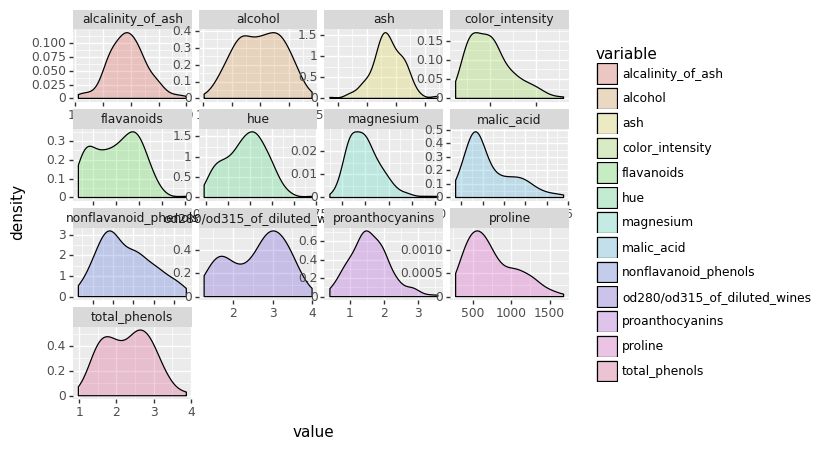

<ggplot: (8786817236337)>

In [11]:
(
    ggplot(pd.melt(x.assign(x = 1), id_vars = 'x'), aes('value', fill = 'variable')) +
    gg.geom_density(alpha = .3) +
    gg.facet_wrap('~variable', scales = 'free')
)

In [12]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [15]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)[:,-1]

In [16]:
accuracy_score(y_te, pred_rf)

1.0

In [37]:
yy = pd.get_dummies(pd.DataFrame(y_te, columns = ['target']), columns = ['target']).iloc[:,2]
fpr, tpr, threshold =  roc_curve(yy, proba_rf)

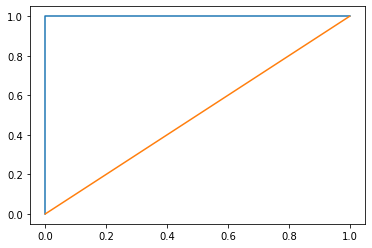

In [38]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

# Customer Analysis

In [39]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'rfm_test.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'retail_data_response.csv',
 'retail_data_transactions.csv',
 'sample_data']

In [43]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.columns = [a.lower() for a in df.columns]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [44]:
df.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [46]:
df = df.dropna()

In [50]:
df = df[~(df.invoiceno.str.contains('C')) & (df.country == 'United Kingdom')]
df.invoicedate = pd.to_datetime(df.invoicedate)
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    354345 non-null  object        
 1   stockcode    354345 non-null  object        
 2   description  354345 non-null  object        
 3   quantity     354345 non-null  int64         
 4   invoicedate  354345 non-null  datetime64[ns]
 5   unitprice    354345 non-null  float64       
 6   customerid   354345 non-null  float64       
 7   country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [53]:
df = df[['customerid', 'invoicedate','quantity',  'unitprice']]
df.head()

,customerid,invoicedate,quantity,unitprice
0,17850.0,2010-12-01 08:26:00,6,2.55
1,17850.0,2010-12-01 08:26:00,6,3.39
2,17850.0,2010-12-01 08:26:00,8,2.75
3,17850.0,2010-12-01 08:26:00,6,3.39
4,17850.0,2010-12-01 08:26:00,6,3.39


In [55]:
df = df.assign(month = df.invoicedate.to_numpy().astype('datetime64[M]'),
          price = df.quantity * df.unitprice
          ).sort_values(['customerid', 'invoicedate'], ascending = [1, 0])
df.head()

,customerid,invoicedate,quantity,unitprice,month,price
61619,12346.0,2011-01-18 10:01:00,74215,1.04,2011-01-01,77183.6
534566,12747.0,2011-12-07 14:34:00,36,6.75,2011-12-01,243.0
534567,12747.0,2011-12-07 14:34:00,10,2.08,2011-12-01,20.8
534568,12747.0,2011-12-07 14:34:00,24,1.65,2011-12-01,39.6
534569,12747.0,2011-12-07 14:34:00,10,2.08,2011-12-01,20.8


In [57]:
df = df[['customerid', 'month', 'price']]
df.head()

,customerid,month,price
61619,12346.0,2011-01-01,77183.6
534566,12747.0,2011-12-01,243.0
534567,12747.0,2011-12-01,20.8
534568,12747.0,2011-12-01,39.6
534569,12747.0,2011-12-01,20.8


In [61]:
list_pu = df.groupby(['customerid', 'month']).first().reset_index()
list_npu = df.groupby(['customerid']).first().reset_index()

In [63]:
list_pu.head()

,customerid,month,price
0,12346.0,2011-01-01,77183.60
1,12747.0,2010-12-01,95.20
2,12747.0,2011-01-01,27.04
3,12747.0,2011-03-01,39.00
4,12747.0,2011-05-01,69.60


In [66]:
list_month = list_pu['month'].sort_values().unique()

In [71]:
mon = list_month[0]
temp_npu = list_npu[list_npu['month'] == mon]
temp = list_pu[list_pu['customerid'].isin(temp_npu['customerid'])]
temp.groupby(['month']).count()

,customerid,price
month,,
2010-12-01,107,107


In [79]:
list_pu[list_pu['customerid'].isin(temp_npu['customerid'])]

,customerid,month,price
118,12855.0,2010-12-01,17.70
342,12967.0,2010-12-01,67.50
439,13011.0,2010-12-01,15.00
504,13033.0,2010-12-01,19.50
560,13065.0,2010-12-01,17.40
...,...,...,...
11326,18074.0,2010-12-01,19.35
11421,18113.0,2010-12-01,76.32
11439,18119.0,2010-12-01,11.95
11545,18176.0,2010-12-01,15.30


In [82]:
df[df['customerid'] == 17850.0]

,customerid,month,price
4543,17850.0,2010-12-01,22.20
4544,17850.0,2010-12-01,22.20
4526,17850.0,2010-12-01,35.40
4527,17850.0,2010-12-01,40.68
4528,17850.0,2010-12-01,33.00
...,...,...,...
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34
5,17850.0,2010-12-01,15.30
